## Importing

In [59]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder
%matplotlib inline

## Viewing

In [103]:
#creating a dataframe from csv provided by the user
#csv_path='r'
#csv_path+=input("Enter path of your csv:")
df=pd.read_csv(r"C:\Users\Krish\Sem3_project\stroke.csv")
print(list(df))
df.head()

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [61]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [63]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Plot

In [114]:
def pie():
    col=input("Enter column name: ")
    pie_df=pd.DataFrame(df.groupby(col)[col].count()) #Checking the percentages of stroke and no-stroke 
    plt.figure(figsize=(8,8))
    pie_df
    colors = ['#B2BEBF','#BD2A2E']
    label1=input("Enter label 1:")
    label2=input("Enter label 2:")
    plt.pie(pie_df[col],labels=[label1,label2],
        autopct='%.1f%%',colors=colors,radius=1,explode = (0, 0.1),shadow=True)
    plt.show()
def count():
    col1=colname()
    col2=input("Enter target variable")
    sns.countplot(data=df, x=col1, hue=col2)
    plt.show()
def scatter():
    col1=colname()
    col2=colname()
    sns.relplot(x = col1, y = col2, data=df)
    plt.show()
def cat():
    col1=colname()
    col2=input("Enter target variable")
    sns.catplot(data=df, x=col2, y=col1, kind="box")
    plt.show()

Select operation number:-
1.Pie plot
2.Countplot
3.Scatter
4.Catplot type box
 1
Enter column name:  stroke
Enter label 1: no
Enter label 2: yes


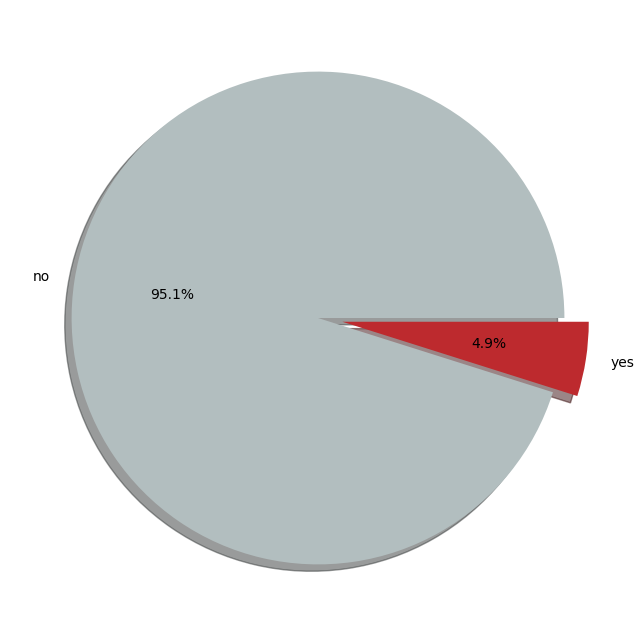

Select operation number:-
1.Pie plot
2.Countplot
3.Scatter
4.Catplot type box
 2
Enter column name: gender
Enter target variable stroke


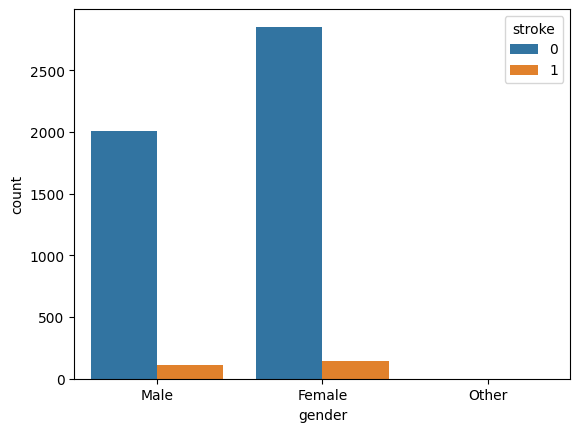

Select operation number:-
1.Pie plot
2.Countplot
3.Scatter
4.Catplot type box
 3
Enter column name: age
Enter target variable bmi


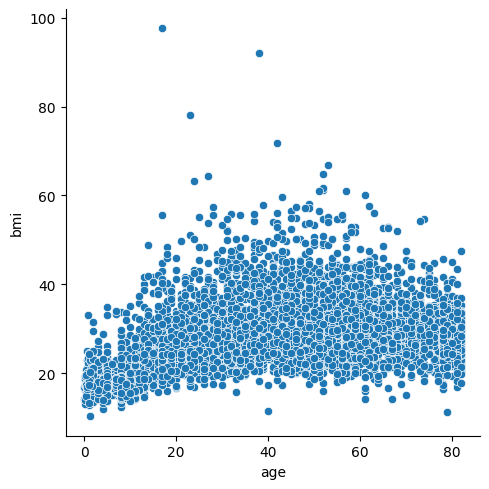

Select operation number:-
1.Pie plot
2.Countplot
3.Scatter
4.Catplot type box
 4
Enter column name: age
Enter target variable stroke


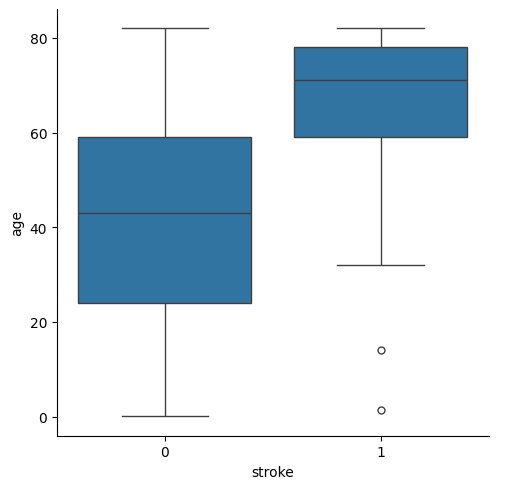

Select operation number:-
1.Pie plot
2.Countplot
3.Scatter
4.Catplot type box
 5


In [115]:
more="Y"
while more.upper()=="Y":
    choice=int(input("Select operation number:-\n1.Pie plot\n2.Countplot\n3.Scatter\n4.Catplot type box\n"))
    if choice == 1:
        pie()
    elif choice == 2:
        count()
    elif choice == 3:
        scatter()
    elif choice == 4:
        cat()
    else:
        more="n"  

## Preprocessing 

In [64]:
#all function definitions
def colname():
    col=input("Enter column name:")
    return col
    

In [65]:
#droping/imputing all nan values 
def impute(column_name,method):
    imp=SimpleImputer(strategy=method,add_indicator=True)
    df[column_name]=imp.fit_transform(df[[column_name]])
more="y"
while more.upper()=="Y":
    choice=int(input("Select operation number:-\n1.Drop\n2.Impute\n3.Exit\n"))
    if choice == 1:
        df.dropna()
        print("All records containing nan values dropped")
    elif choice == 2:
        column_name=input("Enter column name to be imputed:: ")
        method=input("Write strategy for imputing: mean/mode/median: ")
        impute(column_name,method)
        print(f"Imputed {column_name}")
    else:
        more="n"  

Select operation number:-
1.Drop
2.Impute
3.Exit
 2
Enter column name to be imputed::  bmi
Write strategy for imputing: mean/mode/median:  mean


Imputed bmi


Select operation number:-
1.Drop
2.Impute
3.Exit
 3


In [66]:
#OrdinalEncoder
def ord(col):
    hier=[]
    print(df[col].unique())
    for i in range(len(df[col].unique())):
        element=input(f"Enter elemnt no {i}: ")
        hier.append(element)
    print("make sure this matches the previous printed list: ", hier)
    enc=OrdinalEncoder(categories=[hier])
    enc.fit_transform(df[[col]])
    df[col]=enc.fit_transform(df[[col]])
    print("Ordinal encoding successful")

In [67]:
#OneHotEncoder
def ohe(col):
    global df
    ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
    ohetransform=ohe.fit_transform(df[[col]])
    df=pd.concat([df,ohetransform],axis=1).drop(columns=[col])
    print("One Hot Encoding successful")

In [68]:
#Encoding
for i in list(df):
    choice_1=input(f"Does column {i} need encoding? (y/n):")
    if choice_1.upper()=="Y":
        choice_2=input("Is this data hierarchal? (y/n):")
        if choice_2.upper()=="Y":
            ord(i)
        else:
            ohe(i)
    else:
        continue

Does column id need encoding? (y/n): n
Does column gender need encoding? (y/n): y
Is this data hierarchal? (y/n): n


One Hot Encoding successful


Does column age need encoding? (y/n): n
Does column hypertension need encoding? (y/n): n
Does column heart_disease need encoding? (y/n): n
Does column ever_married need encoding? (y/n): y
Is this data hierarchal? (y/n): n


One Hot Encoding successful


Does column work_type need encoding? (y/n): y
Is this data hierarchal? (y/n): n


One Hot Encoding successful


Does column Residence_type need encoding? (y/n): y
Is this data hierarchal? (y/n): n


One Hot Encoding successful


Does column avg_glucose_level need encoding? (y/n): n
Does column bmi need encoding? (y/n): n
Does column smoking_status need encoding? (y/n): y
Is this data hierarchal? (y/n): y


['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Enter elemnt no 0:  Unknown
Enter elemnt no 1:  never smoked
Enter elemnt no 2:  formerly smoked
Enter elemnt no 3:  smokes


make sure this matches the previous printed list:  ['Unknown', 'never smoked', 'formerly smoked', 'smokes']
Ordinal encoding successful


Does column stroke need encoding? (y/n): n


In [69]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,9046,67.0,0,1,228.69,36.600000,2.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,51676,61.0,0,0,202.21,28.893237,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.500000,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.400000,3.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.000000,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Feature Scaling and model 


In [70]:
def stdscale():
    X1=df.iloc[:,0:len(list(df))]
    std_scale=StandardScaler()
    X1=std_scale.fit_transform(X1)
    X1=pd.DataFrame(X1,columns=list(df))
    return X1
def minmax():
    X1=df.iloc[:,0:len(list(df))]
    mscale=MinMaxScaler(feature_range=(0,1))
    X1=mscale.fit_transform(X1)
    X1=pd.DataFrame(X1,columns=list(df))
    return X1

In [71]:
choice=int(input("Do you want to use\n1.Standard Scaler\n2.MinMax Scaler\n"))
if choice==1:
    X1=stdscale()
    print("Successfully used Standard Scaler")
else:
    X1=minmax()
    print("Successfully used MinMax Scaler")

Do you want to use
1.Standard Scaler
2.MinMax Scaler
 2


Successfully used MinMax Scaler


In [72]:
X1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0.123214,0.816895,0.0,1.0,0.801265,0.301260,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.708205,0.743652,0.0,0.0,0.679023,0.212981,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.426015,0.975586,0.0,1.0,0.234512,0.254296,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.824928,0.597168,0.0,0.0,0.536008,0.276060,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.021929,0.963379,1.0,0.0,0.549349,0.156930,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [73]:
X1.corr().style.background_gradient(cmap='GnBu')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.012155,0.006388,-0.002144,0.001776,0.012984,-0.013690,0.013690,-0.000016,0.005459,0.023698,-0.019956,-0.013939,0.001403,-0.001403
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.307009,0.245257,0.027924,-0.027623,-0.010659,-0.679125,0.679125,0.130013,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.106639,0.127904,-0.021143,0.021275,-0.004597,-0.164243,0.164243,0.017685,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.085211,0.134914,-0.085617,0.085717,-0.003343,-0.114644,0.114644,0.001330,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.079825,0.131945,-0.054902,0.054580,0.011489,-0.155068,0.155068,0.013845,-0.014675,0.016588,0.062694,-0.102250,0.004946,-0.004946
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.216498,0.038947,0.025797,-0.025464,-0.011802,-0.335705,0.335705,0.077942,-0.028600,0.203884,0.070822,-0.442843,0.000120,-0.000120
smoking_status,0.012155,0.307009,0.106639,0.085211,0.079825,0.216498,1.000000,0.054914,0.002526,-0.002843,0.011142,-0.284833,0.284833,0.075414,-0.034701,0.173209,0.079098,-0.403603,-0.022853,0.022853
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,0.054914,1.000000,-0.009027,0.009117,-0.003166,-0.108340,0.108340,0.002677,-0.014882,0.011888,0.062168,-0.083869,-0.015458,0.015458
gender_Female,-0.002144,0.027924,-0.021143,-0.085617,-0.054902,0.025797,0.002526,-0.009027,1.000000,-0.999597,-0.016642,-0.030483,0.030483,0.016685,-0.011469,0.032294,0.026143,-0.089120,-0.006340,0.006340
gender_Male,0.001776,-0.027623,0.021275,0.085717,0.054580,-0.025464,-0.002843,0.009117,-0.999597,1.000000,-0.011757,0.029936,-0.029936,-0.016534,0.011496,-0.032639,-0.025971,0.089283,0.005937,-0.005937


In [79]:
from sklearn.preprocessing import LabelEncoder  #encoding (we convert categorical variables into Numeric/float to numeric)

lb=LabelEncoder()
for i in list(X1):
    X1[i]=lb.fit_transform(X1[i])
X1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,671,88,0,1,3850,240,2,1,0,1,0,0,1,0,0,1,0,0,0,1
1,3610,82,0,0,3588,162,1,1,1,0,0,0,1,0,0,0,1,0,1,0
2,2151,101,0,1,2483,199,1,1,0,1,0,0,1,0,0,1,0,0,1,0
3,4226,70,0,0,3385,218,3,1,1,0,0,0,1,0,0,1,0,0,0,1
4,114,100,1,0,3394,113,1,1,1,0,0,0,1,0,0,0,1,0,1,0


In [74]:
col=input("Enter column name of target variable: ")
X = X1.drop([col], axis=1).values  #Features
y = X1[col].values #target variable
from imblearn.over_sampling import SMOTE       # over-sampling our minority target variable
from collections import Counter

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))
from sklearn.preprocessing import StandardScaler     # Standardize features by removing the mean and scaling to unit variance.

scalr=StandardScaler(copy=True,with_mean=True,with_std=True)
X=scalr.fit_transform(X)
from sklearn.model_selection import train_test_split #Split the matrixes into train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,shuffle=True)

Enter column name of target variable:  stroke


Original dataset shape Counter({np.float64(0.0): 4861, np.float64(1.0): 249})
Resampled dataset shape Counter({np.float64(1.0): 4861, np.float64(0.0): 4861})


In [75]:
def cross_val(model,x,cv = 10):   #Create a function for applying cross validation
    '''
    This function for applying cross validation and return  it's performance.
    INPUT:
    model: A ML model.
    x: numpy.ndarray. The features.
    cv: int. The cross validation splitting strategy.
    OUTPUT:
    The cross validation performance.
    '''
    print('----------------- After cross validation -----------------')
    global y
    cv_res = cross_validate(estimator=model,X=x,y=y,n_jobs=-1,cv=cv,return_train_score = True)
    y_pred = cross_val_predict(estimator=model,X=x,y=y,n_jobs=-1,cv=cv)
    print('Training Score:',cv_res['train_score'].mean())
    print('Testing Score:',accuracy_score(y,y_pred))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y,y_pred),annot=True,cmap='GnBu',fmt = 'd')
    plt.title('The Confusion Matrix',color='black')
    plt.xlabel('Predicted',color='black')
    plt.ylabel('Actual',color='black')
    plt.show() 
    print(classification_report(y,y_pred))

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

Training Score: 0.7920724180496502
Testing Score: 0.7889757301522008
----------------- After cross validation -----------------
Training Score: 0.7924752412520615
Testing Score: 0.7918123842830693


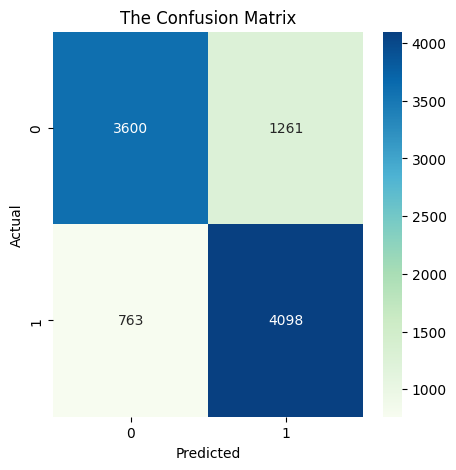

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78      4861
         1.0       0.76      0.84      0.80      4861

    accuracy                           0.79      9722
   macro avg       0.79      0.79      0.79      9722
weighted avg       0.79      0.79      0.79      9722



In [77]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

lr_ytrain_pred = log_reg.predict(X_train)
lr_ytest_pred = log_reg.predict(X_test)

print('Training Score:',accuracy_score(y_train,lr_ytrain_pred))
print('Testing Score:',accuracy_score(y_test,lr_ytest_pred))

cross_val(LogisticRegression(),X)